In [ ]:
#imports
import os
from tensorflow import keras
from tensorflow.keras import layers
from keras import utils as np_utils
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM
from keras.preprocessing import sequence
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
import tensorflow
from keras import backend as K
import keras.optimizers
import keras
import numpy as np
import pandas as pd
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image # Keras own inbuild image class - already loads image, using filepath  (instead of cv2 if you wish- work the same)
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Model
from tensorflow import keras
#keras-preprocessing 1.1.0



In [ ]:
!pip install lime

     |████████████████████████████████| 275 kB 7.9 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=0f2c931a214f55cb8be6b99e1f8c6165de638f33888f1de146afc115b7c86bfb
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
#mobile net base: 
#MobileNet is a streamlined architecture that uses depthwise separable convolutions to construct lightweight deep convolutional neural networks and provides an efficient model for mobile and embedded vision applications

from tensorflow.keras.applications import mobilenet_v2
base_model = mobilenet_v2.MobileNetV2(
    weights='imagenet', 
    alpha=0.35,         # specific parameter of this model, small alpha reduces the number of overall weights
    pooling='avg',      # applies global average pooling to the output of the last conv layer (like a flattening)
    include_top=False  # !!!!! we only want to have the base, not the final dense layers 
)

2031616/2019640 [==============================] - 0s 0us/step


Mount drive to access images

In [ ]:
#mount google drive to access photos

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Test for one image, and then view a random batch and a tangible OHE y train

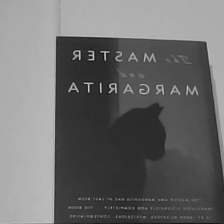

In [ ]:
#load one image (test)
im = load_img('/content/gdrive/MyDrive/Project_9 - SPICED/books/books/08-38-04-747575.png', color_mode='grayscale')
im

In [ ]:
 #define classes and base path

classes = ['books','bottles','coins','cups','cutlery','faces','fruits','gestures','glasses','nail_polishes','pens','plants','shoes','smartphones']

base_path = '/content/gdrive/MyDrive/Project_9 - SPICED'

In [ ]:
# a generator that returns batches of X and y arrays- applies it to base part where there are folders 
train_datagen = image.ImageDataGenerator(rescale=1.0/255.0,validation_split=0.2) 

train_batches = train_datagen.flow_from_directory(directory=base_path, class_mode="categorical",\
target_size=(224,224), classes=classes, batch_size=64,subset='training')

validation_batches = train_datagen.flow_from_directory(directory=base_path, \
target_size=(224,224), classes=classes, batch_size=64,subset='validation')

Found 1006 images belonging to 14 classes.
Found 244 images belonging to 14 classes.


In [ ]:
# load in all images at once -next iterates through different batches 

xtrain,ytrain=next(train_batches)
xtrain.shape, ytrain.shape

#take test batches using validation split
Xtest, ytest = next(validation_batches)

In [ ]:
#lets show some images! -6,5 for first thirty (images arr generated with preceding code)

def plotImages(images_arr):
    fig, axes = plt.subplots(6, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

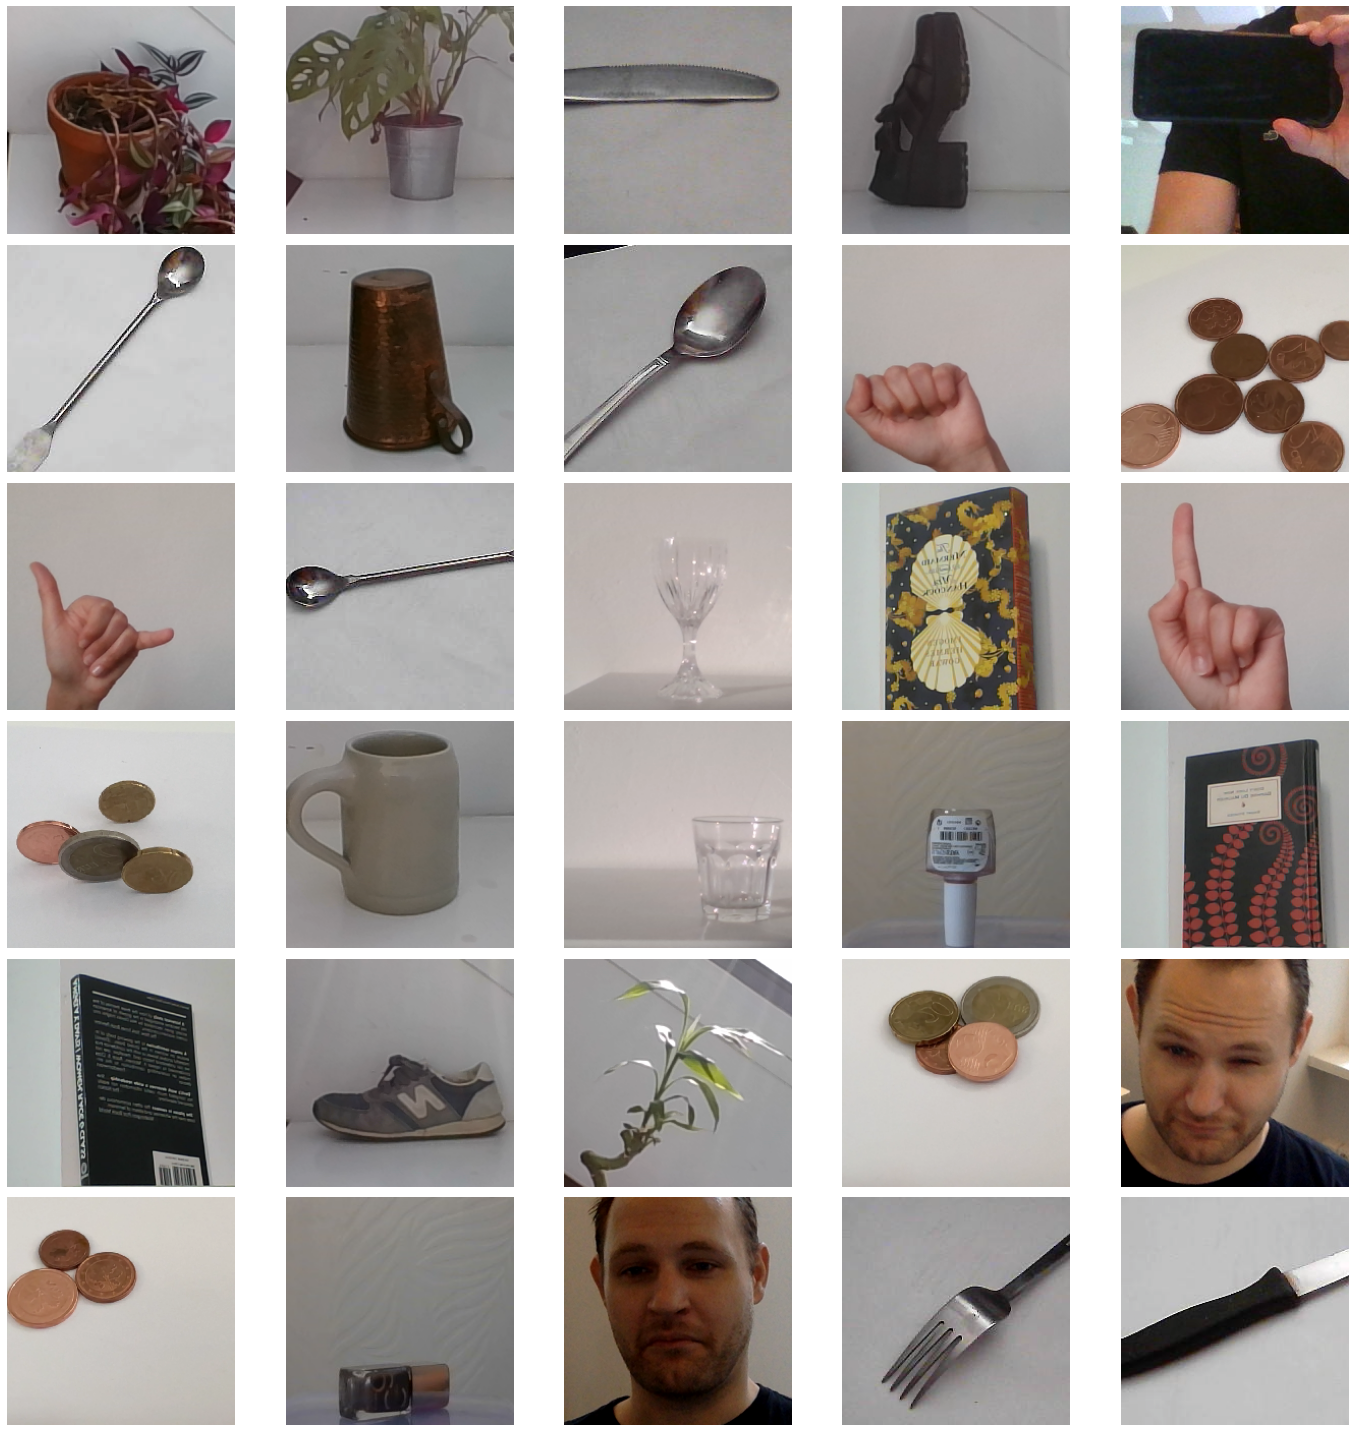

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0.

In [ ]:
#plot first thirty images and print ytrain to see OHE output

plotImages(xtrain)
print(ytrain)

Freeze weights on base model, aadd dense layers

In [ ]:
#freeze the weights so dont have to begin from scratch

base_model.trainable = False

In [ ]:
#define model (using base model defined above) and customise various layers (based on class example)

model = keras.Sequential()

model.add(base_model) #layer with entire base model?

model.add(keras.layers.Flatten()) #flatten conv layers layer 

model.add(keras.layers.Dense(100, activation='relu')) #additional custom layer (would work better as multiple of two)

model.add(keras.layers.Dropout(0.3))  #reduce redundant information

model.add(keras.layers.Dense(len(classes), activation='softmax')) #!!! Final layer with a length of 2 (length of classes), and softmax activation 
# have a look at the trainable and non-trainable params statistic

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_0.35_224 (Funct  (None, 1280)             410208    
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 100)               128100    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 14)                1414      
                                                                 
Total params: 539,722
Trainable params: 129,514
Non-trainable params: 410,208
____________________________________________

Time to compile and train!!

In [ ]:
#compile (i.e. calling on a pre-built model and it specifying the loss function, optimizer, and metrics)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.categorical_crossentropy,
              metrics=[keras.metrics.categorical_accuracy])

# observe the validation loss and stop when it does not improve after 3 iterations
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
#fit the model

model.fit(xtrain, ytrain, 
          epochs=50, 
          verbose=2,
          callbacks=[callback],
          # use 30% of the data for validation
          validation_split=0.3)

Epoch 1/50
2/2 - 4s - loss: 2.7819 - categorical_accuracy: 0.0909 - val_loss: 1.8835 - val_categorical_accuracy: 0.5000 - 4s/epoch - 2s/step
Epoch 2/50
2/2 - 1s - loss: 1.7204 - categorical_accuracy: 0.5909 - val_loss: 1.4930 - val_categorical_accuracy: 0.7000 - 736ms/epoch - 368ms/step
Epoch 3/50
2/2 - 1s - loss: 1.2003 - categorical_accuracy: 0.7727 - val_loss: 1.2330 - val_categorical_accuracy: 0.8000 - 715ms/epoch - 358ms/step
Epoch 4/50
2/2 - 1s - loss: 0.7686 - categorical_accuracy: 0.8636 - val_loss: 1.0346 - val_categorical_accuracy: 0.8000 - 717ms/epoch - 359ms/step
Epoch 5/50
2/2 - 1s - loss: 0.5027 - categorical_accuracy: 0.8864 - val_loss: 0.9021 - val_categorical_accuracy: 0.8000 - 712ms/epoch - 356ms/step
Epoch 6/50
2/2 - 1s - loss: 0.3678 - categorical_accuracy: 0.9318 - val_loss: 0.7947 - val_categorical_accuracy: 0.8000 - 715ms/epoch - 358ms/step
Epoch 7/50
2/2 - 1s - loss: 0.2269 - categorical_accuracy: 1.0000 - val_loss: 0.7170 - val_categorical_accuracy: 0.8500 - 71

In [ ]:
# evaluate the model and print the results
score = model.evaluate(Xtest, ytest, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

2/2 [==============================] - 2s 357ms/step - loss: 0.4263 - categorical_accuracy: 0.8594
Test loss: 0.42634427547454834
Test accuracy: 0.859375


In [ ]:
#load one image (test)
img =image.load_img('/content/gdrive/MyDrive/Project_9 - SPICED/books/books/08-38-04-747575.png', target_size=(224,224))

(224, 224)

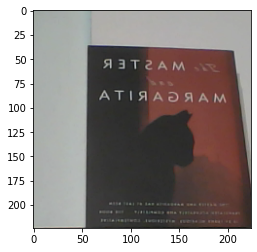

In [ ]:
plt.imshow(img)
img.size

In [ ]:
a = image.img_to_array(img,dtype='uint8')

In [ ]:
a = preprocess_input(a)

In [ ]:
a = np.expand_dims(a, axis = 0)

In [ ]:
model.evaluate(xtrain,ytrain)

2/2 [==============================] - 1s 365ms/step - loss: 0.1496 - categorical_accuracy: 0.9844


[0.14956438541412354, 0.984375]

In [ ]:
model.predict(a)[0].round(decimals = 3)

array([0.962, 0.   , 0.001, 0.   , 0.001, 0.001, 0.   , 0.   , 0.   ,
       0.034, 0.   , 0.   , 0.   , 0.001], dtype=float32)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

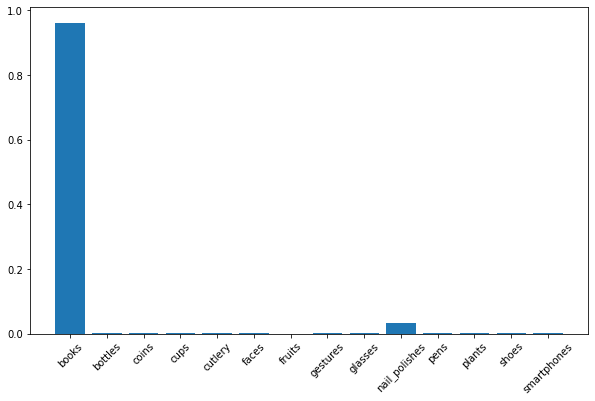

In [ ]:
plt.bar(x = classes, height = model.predict(a)[0])

plt.rcParams["figure.figsize"] = (10,6)
plt.xticks(rotation=45)

#correctly predicted to be a book

In [ ]:
from lime import lime_image
explainer = lime_image.LimeImageExplainer()
# Hide color is the color for a superpixel turned OFF. Alternatively,
#if it is NONE, the superpixel will be replaced by the average of its pixels
#explanation = explainer.explain_instance('a', model.predict)